In [1]:
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3
# algo = "ensgaii"
# path = f"data/temporary/NU_DATA/{algo}/{str(ssp).split('.')[1]}/"
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# loaded_df = pd.read_csv(
#     f"data/optimized_rbf_weights/limitarian/50k/{swf.value[1]}/{swf.value[1]}_reference_set.csv"
# )
# policy_indices = list(range(len(loaded_df)))
# print(f"Policy Indices: {policy_indices}")
# scenario_list = ["SSP119", "SSP126", "SSP245", "SSP370", "SSP434", "SSP460", "SSP534"]

print(f"Loading data from {path}...")

Loading data from data/temporary/NU_DATA/combined/SSP3/...


In [2]:
# This code creates a reference set from the different seeds

from solvers.convergence.hypervolume import get_global_reference_set, calculate_hypervolume_from_archives
import multiprocessing
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

list_of_objectives = [
    "welfare",
    "fraction_above_threshold",
]
data_path = path 

direction_of_optimization = ["min", "min"] #, "max", "max"

get_global_reference_set(
    list_of_objectives=list_of_objectives,
    data_path=data_path,
    #file_name=None,
    swf=[
        swf.value[1],
    ],
    nfe=str(nfe), # Ran for 50k number of function evaluations

    # Setting the same epsilon values as optimization process  (see analysis/analyzer.py)
    epsilons=[
        0.0001,
        0.01,
    ],
    direction_of_optimization=direction_of_optimization,
    output_data_path=path,
    saving=True,
)

## This computes the Hypervolume for the reference set

filenames = [


    # Loading Archives for the different seeds  Borg
    f"{swf.value[1]}_{nfe}_521475.tar.gz",
    f"{swf.value[1]}_{nfe}_1644652.tar.gz",
    f"{swf.value[1]}_{nfe}_3569126.tar.gz",
    f"{swf.value[1]}_{nfe}_6075612.tar.gz",

    #epsNSGA
    f"{swf.value[1]}_{nfe}_52147500.tar.gz",
    f"{swf.value[1]}_{nfe}_164465200.tar.gz",
    f"{swf.value[1]}_{nfe}_356912600.tar.gz",
    f"{swf.value[1]}_{nfe}_607561200.tar.gz",
   


]

reference_set = f"{swf.value[1]}_reference_set.csv"
with multiprocessing.Pool() as pool:
    # Enumerate through the filenames
    for filename in filenames:
        scores = calculate_hypervolume_from_archives(
            list_of_objectives=list_of_objectives,
            direction_of_optimization=direction_of_optimization,
            input_data_path=data_path,
            file_name=filename,
            output_data_path=path,
            saving=True,
            global_reference_set=True,
            global_reference_set_path=path,
            global_reference_set_file=reference_set,
            pool=pool,
          )  # NOTE: Change this according to the PF refset

Loading list of files
Loading archives for:  UTILITARIAN
Filename:  Prioritarian_hypervolume_plot.svg
Filename:  .DS_Store
Filename:  PRIORITARIAN_50000_3569126_hv.csv
Filename:  UTILITARIAN_50000_3569126.tar.gz
Matching file: UTILITARIAN_50000_3569126.tar.gz
Loading archives from: UTILITARIAN_50000_3569126.tar.gz
Max key: 50000
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_3569126.tar.gz
Filename:  UTILITARIAN_50000_521475.tar.gz
Matching file: UTILITARIAN_50000_521475.tar.gz
Loading archives from: UTILITARIAN_50000_521475.tar.gz
Max key: 50000
Number of rows in archive: 11
Archives loaded for: UTILITARIAN_50000_521475.tar.gz
Filename:  PRIORITARIAN_50000_607561200.tar.gz
Filename:  PRIORITARIAN_50000_52147500.tar.gz
Filename:  UTILITARIAN_50000_6075612.tar.gz
Matching file: UTILITARIAN_50000_6075612.tar.gz
Loading archives from: UTILITARIAN_50000_6075612.tar.gz
Max key: 50001
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_6075612.tar.gz
File

In [3]:
from justice.util.visualizer import plot_hypervolume


input_data_path_list = {
    
   swf.value[1]: [
        f"{swf.value[1]}_{nfe}_521475_hv.csv",
        f"{swf.value[1]}_{nfe}_1644652_hv.csv",
        f"{swf.value[1]}_{nfe}_3569126_hv.csv",
        f"{swf.value[1]}_{nfe}_6075612_hv.csv",

        f"{swf.value[1]}_{nfe}_52147500_hv.csv",
        f"{swf.value[1]}_{nfe}_164465200_hv.csv",
        f"{swf.value[1]}_{nfe}_356912600_hv.csv",
        f"{swf.value[1]}_{nfe}_607561200_hv.csv",
    ],
}


fig = plot_hypervolume(
    path_to_data=path,
    path_to_output=path,
    input_data=input_data_path_list,
    yaxis_upper_limit=0.7,
    width=1000,
    height=800,
    fontsize=20,
    saving=True,
)

fig.show()

In [ ]:

# NOTE: Restart the Kernel after each run. Jupyter has some issues running this which corrupts the data file

import IPython
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

selected_indices = get_selected_policy_indices_based_on_welfare_temperature(
    
    # Change This and the one below
    rival_framings=[
        swf.value[1]
    ],
    data_dir=path,
    n_percent=0.1, # 10% of the data
    second_objective_of_interest="fraction_above_threshold",  # This is the second objective of interest
)
print(selected_indices)
# ############################################################################################################
scenario_list = ["SSP370"] # SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

# NOTE: The following code generates large dataframes and saved them in the data/temporary folder. Size is ~ 1.5 GB each run
reevaluate_optimal_policy(
    
    # Change this
    input_data=[

        f"{swf.value[1]}_reference_set.csv",

    ],
    path_to_rbf_weights=path,  #  reevaluation
    path_to_output=path,
    direction_of_optimization=[
        "min",
        "min",

    ],
    rbf_policy_index= selected_indices[0], # This chooses policy for a particular rival framing. NOTE: Can also set to the index directly
    list_of_objectives=[
        "welfare",
        "fraction_above_threshold",

    ],
    scenario_list=scenario_list,  
)



# Restarting the Kernel
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel



Reading data/temporary/NU_DATA/ensgaii/SSP3/UTILITARIAN_reference_set.csv
Index of interest for UTILITARIAN: 0
[np.int64(0)]
index for policy:  0
3 SSP370
Welfare:  111.45053698679108
Keys of the scenario data:  dict_keys(['SSP370'])
File saved as UTILITARIAN_reference_set_idx0 at location data/temporary/NU_DATA/ensgaii/SSP3/


{'status': 'ok', 'restart': True}

: 

In [2]:
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

idx = 1 # (22-Utilitarian SSP2, 9 for SSP3, PRIOR 6 for SSP2 and 3 for SSP3) ENSGAII(U SSP2 - 1; P SSP2-3; U SSP3 0;  P SSP3-1)
scenario_list = ["SSP370"] ## SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon




############################################################################################################
reevaluated_optimal_policy_variable_extractor(
    scenario_list=scenario_list,  # ['SSP245'],
    region_list=region_list,
    list_of_years=list_of_years,
    path_to_data=path, 
    path_to_output=path,
    
    variable_name="constrained_emission_control_rate", #"constrained_emission_control_rate", #"emissions",  # "global_temperature" (USE with data_shape=2, 
    data_shape=3, #NOTE CHANGE THIS: 2 Only for temperature, 3 for rest (emission, constrained_emission_control_rate)
    
    no_of_ensembles=1001,
    input_data=[
        # Main Set for analysis - 10% Welfare
        f"{swf.value[1]}_reference_set_idx{idx}.h5",



    ],
    output_file_names=[ # NOTE: Change these accordingly
        swf.value[1],


    ],
)




/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP370
File saved as PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate at location data/temporary/NU_DATA/ensgaii/SSP3


In [3]:
import numpy as np
import plotly.express as px

import pandas as pd

from justice.util.visualizer import plot_choropleth_2D_data


fig, prior_data = plot_choropleth_2D_data(
    path_to_data=path,
    path_to_output=path, #/rbf_dist_test
    projection= "natural earth1", 
    colourmap= px.colors.sequential.Reds,
    year_to_visualize=2050,
    input_data_path_list=[

        # "UTILITARIAN_idx9_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        # "UTILITARIAN_idx9_SSP370_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP370_constrained_emission_control_rate.npy",

        #ESNGAII
        # "UTILITARIAN_idx1_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        "UTILITARIAN_idx0_SSP370_constrained_emission_control_rate.npy",
        "PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate.npy",


    ],
        
    data_label="Emission Control Rate",
    legend_label="", 
    data_normalization=True,
    saving=True,
    show_colorbar=True,
    normalized_colorbar=True,

)

fig.show()


Taking average over the last dimension.
Taking average over the last dimension.
0
1


### Scatter Plot

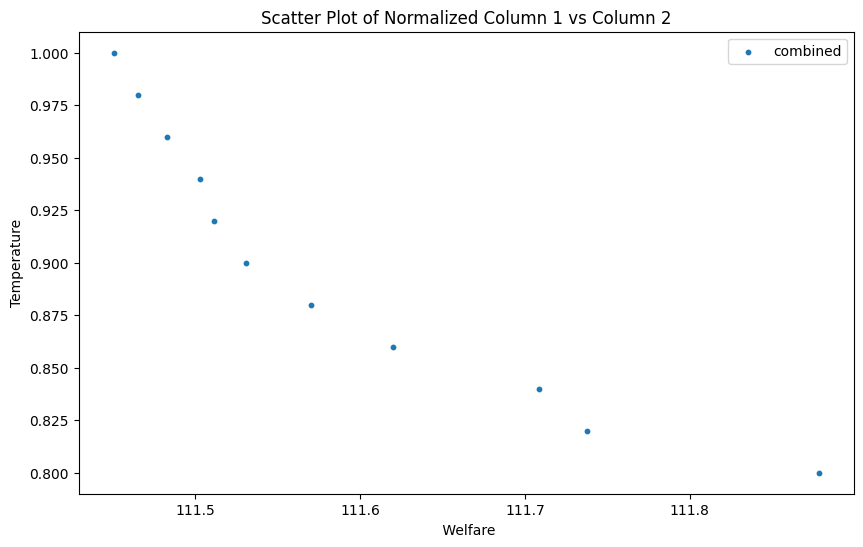

In [5]:
# Read the file 50000.csv in folder nu_50k
import matplotlib.pyplot as plt
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3

path1 = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
df1 = pd.read_csv(path1 + f"{swf.value[1]}_reference_set.csv")

# path2 = f"data/temporary/NU_DATA/borg/{str(ssp).split('.')[1]}/"
# df2 = pd.read_csv(path2 + f"{swf.value[1]}_reference_set.csv")

# Select only the lst 2 columns
df1 = df1.iloc[:, -2:]

# Select only the lst 2 columns
# df2 = df2.iloc[:, -2:]



# Make the size of the points larger
plt.figure(figsize=(10, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=10, label='combined')
# plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], s=10, color='red', label='BORG')



plt.legend()

plt.xlabel(' Welfare')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Normalized Column 1 vs Column 2')
plt.show()


# Reference set to policy outcomes

In [ ]:
# Check this method out too: #NOTE ROUGH

from justice.util.output_data_processor import process_scenario

import os
import filecmp
import pandas as pd
from pathlib import Path
import multiprocessing as mp
from functools import partial
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import process_scenario


if __name__ == "__main__":
    ######################################
    scenario_list = ["SSP245"]

    social_welfare_function = WelfareFunction.PRIORITARIAN
    nfe = 50_000
    ssp = SSP.SSP2

    sw_name = social_welfare_function.value[1]
    path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
    filename = f"{sw_name}_reference_set.csv"

    # Print the selected policy indices values of last 4 columns
    # Find the min and max welfare values for utilitarian and prioritarian
    loaded_df = pd.read_csv(path + filename)
    policy_indices = list(range(len(loaded_df)))

    sw_name = social_welfare_function.value[1]

    filename = f"{sw_name}_reference_set.csv"

    loaded_df = pd.read_csv(path + filename)
    print(f"Loading data for {sw_name} from {path+filename}")
    print("Selected policy‑indices last 2 columns:")
    print(loaded_df.iloc[policy_indices, -2:])

    # spawn‐based pool so that each worker is a fresh interpreter
    mp.set_start_method("spawn")
    # Bind the fixed arguments swf and policy_indices to process_scenario
    bound_process_scenario = partial(
        process_scenario, social_welfare_function, policy_indices
    )
    with mp.Pool(processes=len(scenario_list)) as pool:
        pool.map(bound_process_scenario, scenario_list)


#### Reevaluation 

###### Run nu_analysis.py - Parallelizes the process over the scenarios
###### Only after running nu_analysis.py, the data is available analysis

In [1]:
import pandas as pd
from pathlib import Path

from justice.util.enumerations import WelfareFunction, SSP
import h5py
from justice.util.output_data_processor import generate_reference_set_policy_mapping
import pandas as pd
from pathlib import Path


nfe = 50_000
ssp = SSP.SSP3



path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
# Example usage
# 1) Set up paths & scenarios
swf           = WelfareFunction.PRIORITARIAN
base_dir      = Path(path)
saving       = True

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

mapping = generate_reference_set_policy_mapping(
    swf=swf,
    data_root=base_dir,
    scenario_list=scenario_list,
    saving=saving,
    output_directory="mapping",
    delete_loaded_files= True,  # Set to True to delete the loaded files after processing
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 4 policies (0 to 3)
All files loaded successfully.
Wrote mapping to data/temporary/NU_DATA/combined/SSP3/mapping/mapping_PRIORITARIAN.h5
Deleting loaded CSV files...
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP460_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/0_SSP534_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP3/1

#### Read the mapping data

In [2]:
import h5py
from pathlib import Path
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import read_reference_set_policy_mapping


# Example usage

swf           = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# base_dir      = Path(path)


mapping = read_reference_set_policy_mapping(path, swf.value[1], mapping_subdir="mapping", hdf5_filename_template="mapping_{}.h5")
# Example to access the mapping
print(mapping[0]["SSP534"]["utilitarian_welfare"])

print(mapping[0]['fraction_above_threshold'])

[-98.13660416 -97.92886322 -98.29999179 ... -98.13745597 -98.06694069
 -98.29892333]
0.32


##### Compute 90th percentile regret

In [1]:
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
from justice.util.output_data_processor import compute_p90_regret_dataframe
from justice.util.enumerations import WelfareFunction, SSP



#### Example usage

# Define parameters similar to your original code
swf = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

variable_of_interest = "prioritarian_welfare" #"prioritarian_welfare" #"utilitarian_welfare" #"global_temperature" # Ensure same welfare function 
direction_of_interest = "max" # Use min for global temperature, max for welfare variables

baseline_scenario = "SSP245" # Change this when working with different scenarios

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]


# Call the function to compute the p90 regret dataframe and save it
p90_delta_df = compute_p90_regret_dataframe(
    base_path=path,
    welfare_function_name=swf.value[1],
    baseline_scenario=baseline_scenario,
    scenario_list=scenario_list,
    variable_of_interest=variable_of_interest,
    direction_of_interest=direction_of_interest,
    mapping_subdir="mapping",
    hdf5_filename_template="mapping_{}.h5",
    save_df=True,  # Save CSV file
    df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved p90 delta data to data/temporary/NU_DATA/combined/SSP2/p90_regret_PRIORITARIAN_prioritarian_welfare.csv


#### Visualize the regret metrics

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PRIORITARIAN
Policy index with minimum regret: 6


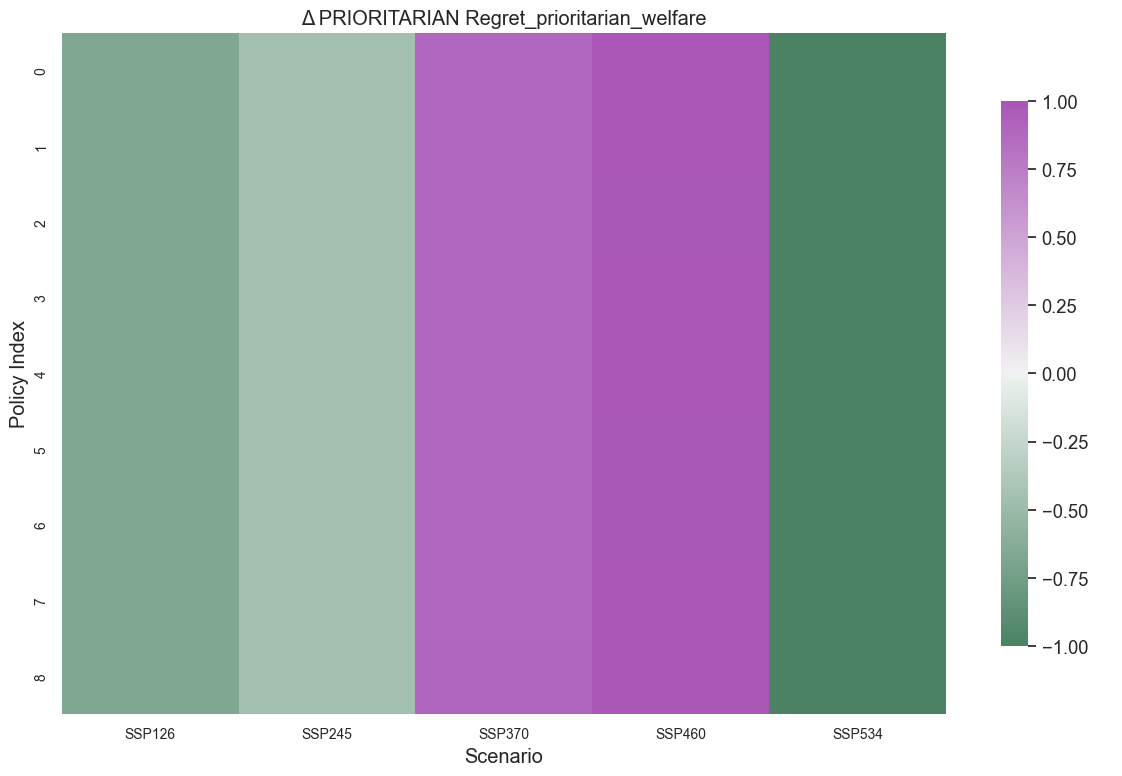

<Axes: title={'center': 'Δ PRIORITARIAN Regret_prioritarian_welfare'}, xlabel='Scenario', ylabel='Policy Index'>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from justice.util.visualizer import plot_regret_heatmap
import pandas as pd
from justice.util.output_data_processor import minimax_regret_policy
from justice.util.enumerations import WelfareFunction, SSP

# Example usage:
# Define parameters similar to your original code
swf = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
variable_of_interest = "prioritarian_welfare"


swf_name = swf.value[1]  # e.g., 'prioritarian' or 'utilitarian'
print(swf_name)
baseline_scenario     = "SSP245"
base_dir              = Path(path)
plot_dir              = base_dir / "plots"
plot_dir.mkdir(exist_ok=True, parents=True)

data = pd.read_csv(
    base_dir / f"p90_regret_{swf_name}_{variable_of_interest}.csv",
    index_col=0,)
name = f"Regret_{variable_of_interest}" #"Utilitarian_Temperature_Regret"


temp_idx = minimax_regret_policy(data)   
print("Policy index with minimum regret:", temp_idx)

# Suppose you have N rows and M columns.  A good rule‐of‐thumb is:
#   height = N * row_height, width = M * col_width
# e.g. row_height=0.25 inch, col_width=1 inch
n_rows, n_cols = data.shape
fig_w = n_cols * 1.0
fig_h = n_rows * 0.25

plot_regret_heatmap(
    data=data,
    figsize=(12, 8),
    font_scale=1.2,
    cmap= sns.diverging_palette(145, 300, s=60, as_cmap=True),#sns.diverging_palette(220, 20, as_cmap=True),#"vlag", #"coolwarm",
    center=0.0,
    square=True,
    cbar_label=" ",
    title=f"Δ {swf_name} {name}",
    show_values=False,           # ← turn on annotations
    fmt=".3f",                  # three decimal places
    annot_kws={"size": 8, "color": "black"},
    save_path=plot_dir / f"{swf_name}_{name}_{variable_of_interest}_diff_annotated.svg",
    xtick_labelsize=10,
    ytick_labelsize=10,
    scaling=True,               # ← scale to [-1,1]
)

#### Extract variables for selected policies
SSP2

```
    Utilitarian
                Welfare Regret    | Temperature Regret
            pi:  29               | 4
    
    Prioritarian
                Welfare Regret    | Temperature Regret
            pi:   6               | 8
```

In [1]:
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
from justice.util.enumerations import WelfareFunction, SSP

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1



data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon


swf = WelfareFunction.UTILITARIAN
policy_index = 29 #Put the policy index here.
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

base_dir                = path
input_data_name = f"{swf.value[1]}_reference_set_idx{policy_index}.h5"

scenario = scenario_list[4] # Iterate manually through the scenarios and reset kernel every scenario

print(f"Processing scenario: {scenario} with policy index: {policy_index} for {swf.value[1]}")

##############################################################################

# NOTE: The following code generates large dataframes and saved them in the data/temporary folder. Size is ~ 1.5 GB each run

reevaluate_optimal_policy(
    input_data=[
        f"{swf.value[1]}_reference_set.csv",


    ],

    path_to_rbf_weights=path,  #  reevaluation
    path_to_output=path,  #  reevaluation
    direction_of_optimization=[
        "min",
        "min",
    ],
    rbf_policy_index= policy_index, #selected_indices[0], # This chooses policy for a particular rival framing. Can also set to the index directly
    list_of_objectives=[
        "welfare",
        "fraction_above_threshold",
    ],
    scenario_list= [scenario],  
)


############################################################################################################

variable_names_and_shapes = {
    "global_temperature": 2,
    "constrained_emission_control_rate": 3,
    "emissions": 3,
}
for variable_name, data_shape in variable_names_and_shapes.items():
    reevaluated_optimal_policy_variable_extractor(
        scenario_list= [scenario],  
        region_list=region_list,
        list_of_years=list_of_years,
        path_to_data=path,  
        path_to_output=path,   
        variable_name=variable_name,
        data_shape=data_shape, # 2 for temperature, 3 for rest
        no_of_ensembles=1001,
        input_data=[
            input_data_name,
        ],
        output_file_names=[
            f"{swf.value[1]}_{variable_name}",
        ],
    )



/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processing scenario: SSP534 with policy index: 29 for UTILITARIAN
index for policy:  29
6 SSP534
Welfare:  103.46363063352744
Keys of the scenario data:  dict_keys(['SSP534'])
File saved as UTILITARIAN_reference_set_idx29 at location data/temporary/NU_DATA/combined/SSP2/
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_global_temperature_idx29_SSP534_global_temperature at location data/temporary/NU_DATA/combined/SSP2
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_constrained_emission_control_rate_idx29_SSP534_constrained_emission_control_rate at location data/temporary/NU_DATA/combined/SSP2
Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP534
File saved as UTILITARIAN_emissions_idx29_SSP534_emissions at location data/temporary/NU_DATA/combined/SSP2


In [1]:
from justice.util.visualizer import plot_comparison_with_boxplots
from justice.util.enumerations import WelfareFunction, SSP
ssp = SSP.SSP2

path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

regret_type = "Welfare_Regret" # "Welfare_Regret" or "Temperature_Regret"

plot_comparison_with_boxplots(
    data_paths=[

        # Prioritarian Welfare Regret
        # path + "PRIORITARIAN_emissions_idx6_SSP126_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP245_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP370_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP460_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx6_SSP534_emissions.npy",

        # Prioritarian Temperature Regret
        # path + "PRIORITARIAN_emissions_idx8_SSP126_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP245_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP370_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP460_emissions.npy",
        # path + "PRIORITARIAN_emissions_idx8_SSP534_emissions.npy",

        # Utilitarian Welfare Regret
        path + "UTILITARIAN_emissions_idx29_SSP126_emissions.npy",
        path + "UTILITARIAN_emissions_idx29_SSP245_emissions.npy",
        path + "UTILITARIAN_emissions_idx29_SSP370_emissions.npy",
        path + "UTILITARIAN_emissions_idx29_SSP460_emissions.npy",
        path + "UTILITARIAN_emissions_idx29_SSP534_emissions.npy",
    
    ],
    labels=[
        
        'SSP1',
        'SSP2',
        'SSP3',
        'SSP4',
        'SSP5',
        ], 
    start_year=2015,
    end_year=2300,
    data_timestep=5,
    timestep=1,
    visualization_start_year=2015,
    visualization_end_year=2100,
    yaxis_range=[0, 80],
    plot_title=' ',
    xaxis_title='Year',
    yaxis_title='Global Emissions (GtCO2)',
    template='plotly_white',
    width=1000,
    height=700,
    output_path=path +"/"+ "plots",
    saving=True,
    show_red_dashed_line=False,
    show_interquartile_range=True,
    linecolors=[
 

        "rgba(141,211,199, 1)",
        "rgba(254,217,166, 1)", 
        "rgba(190,186,218, 1)", 
        "rgba(128,177,211, 1)", 
        "rgba(251,128,114, 1)", 
        ],
    colors = [ 

        "rgba(141,211,199, 0.4)", 
        "rgba(254,217,166, 0.4)",
        "rgba(190,186,218, 0.4)", 
        "rgba(128,177,211, 0.4)", 
        "rgba(251,128,114, 0.4)", 

        ],
    first_plot_proportion=[0, 0.75],
    second_plot_proportion=[0.85, 1],
    transpose_data=True,
    show_min_max = False,
    dtick=10,
    output_name_suffix=regret_type,
)

Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
